## Microsoft wants to make a Big Film


## Overview
This project focus on which type to movie to make based on audience point of view and what type of movie has gained profit .Microsoft team could use these analyses for their new beginging in the film industry.It would help them in making high grossing film

## Business Problem
Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies.I have used data based on genres and the movie length to find the high gross and high rating .

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
title=pd.read_csv('zippeddata/imdb.title.basics.csv.gz')
rating=pd.read_csv('zippeddata/imdb.title.ratings.csv.gz')
gross=pd.read_csv('zippedData/bom.movie_gross.csv.gz')
budget=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
crew=pd.read_csv('zippedData/imdb.title.crew.csv.gz')
principals=pd.read_csv('zippedData/imdb.title.principals.csv.gz')
movie_info=pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t', encoding='iso-8859-1')
reviews=pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='iso-8859-1')
titles=pd.read_csv('zippedData/tmdb.movies.csv.gz')
# df = pd.read_csv('zippedData/rt.reviews.tsv.gz', compression='gzip', delimiter='\t', encoding='iso-8859-1')



In [3]:
title.info()
title.head()
# titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [6]:
gross['foreign_gross'].str.contains(',').sum()


5

In [7]:
gross['foreign_gross']=gross['foreign_gross'].str.replace(',','')


In [8]:
gross['foreign_gross'].str.contains(',').any()

False

In [9]:
gross['foreign_gross'].str.contains('.').sum()

2037

In [10]:
gross['foreign_gross']=gross['foreign_gross'].astype(float)

In [11]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null float64
year              3387 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


### Data Cleaning

In [12]:
title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [13]:
# title.drop('original_title',axis=1,inplace=True)

In [14]:
title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [15]:
title['runtime_minutes']=title['runtime_minutes'].fillna(0)

In [16]:
title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    146144 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [17]:
title['genres'].isna().sum()/len(title)

0.037004598204510616

In [18]:
title=title.dropna()

In [19]:
(title['runtime_minutes']==0).sum()/len(title)

0.20252391035570652

In [20]:
title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140734 entries, 0 to 146143
Data columns (total 6 columns):
tconst             140734 non-null object
primary_title      140734 non-null object
original_title     140734 non-null object
start_year         140734 non-null int64
runtime_minutes    140734 non-null float64
genres             140734 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 7.5+ MB


In [21]:
title[title.duplicated(subset=['primary_title','start_year','runtime_minutes'],keep=False)].sort_values(by='primary_title')
title.drop_duplicates(subset=['primary_title','start_year','runtime_minutes'],inplace=True)

In [22]:
title[title.duplicated(subset=['primary_title','start_year','runtime_minutes'],keep=False)].sort_values(by='primary_title').any()

tconst             False
primary_title      False
original_title     False
start_year         False
runtime_minutes    False
genres             False
dtype: bool

In [23]:
title[title.duplicated(subset=['primary_title','start_year'],keep=False)].sort_values(by='primary_title')
title.drop_duplicates(subset=['primary_title','start_year'],inplace=True)

In [24]:
# title[title['primary_title'].str.contains("\(")]

In [25]:
title[title.duplicated(subset=['primary_title','start_year'],keep=False)].sort_values(by='primary_title').any()

tconst             False
primary_title      False
original_title     False
start_year         False
runtime_minutes    False
genres             False
dtype: bool

In [26]:
title.drop('original_title',axis=1,inplace=True)

In [27]:
title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138924 entries, 0 to 146143
Data columns (total 5 columns):
tconst             138924 non-null object
primary_title      138924 non-null object
start_year         138924 non-null int64
runtime_minutes    138924 non-null float64
genres             138924 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 6.4+ MB


In [28]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null float64
year              3387 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [29]:
gross.duplicated().any()

False

In [30]:
gross[gross.duplicated(subset='title',keep=False)]

,title,studio,domestic_gross,foreign_gross,year
317,Bluebeard,Strand,33500.0,5200.0,2010
3045,Bluebeard,WGUSA,43100.0,NaN,2017


In [31]:
# gross.isna().sum()

In [32]:
# gross['foreign_gross'].isna().sum()/len(gross['foreign_gross'])

In [33]:
# gross.describe()
# print(gross['foreign_gross'].apply(['median','mean','std']))


In [34]:
# gross['foreign_gross'].plot(kind='hist',figsize=(10,8))
# gross.hist(column='foreign_gross')

In [35]:
# gross_mean=gross['foreign_gross'].fillna(value=gross['foreign_gross'].mean())
# print(gross_mean.apply(['median','mean','std']))
# gross_mean.hist()


In [36]:
# gross_median=gross['foreign_gross'].fillna(gross['foreign_gross'].median())
# print(gross_median.apply(['median','mean','std']))
# gross_median.hist()

In [37]:
# title_tconst=pd.merge(title,rating, on='tconst',how='left')
title_tconst=title.merge(rating,on='tconst',how='inner')
# title_tconst.head()

# animal_shelter_df  = pd.merge(intakes, 
#                               outcomes, 
#                               on=['animal_id', 'event_num'], 
#                               how='left')

In [38]:
title_tconst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72300 entries, 0 to 72299
Data columns (total 7 columns):
tconst             72300 non-null object
primary_title      72300 non-null object
start_year         72300 non-null int64
runtime_minutes    72300 non-null float64
genres             72300 non-null object
averagerating      72300 non-null float64
numvotes           72300 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 4.4+ MB


In [39]:
# title_tconst[title_tconst['primary_title'].str.contains('\(')]
title_tconst[title_tconst.duplicated(subset=['primary_title','start_year'],keep=False)].sort_values(by='primary_title')

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes


In [40]:
title_tconst.rename(columns={'primary_title':'title','start_year':'year'},inplace=True)
title_tconst.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 72300 entries, 0 to 72299
Data columns (total 7 columns):
tconst             72300 non-null object
title              72300 non-null object
year               72300 non-null int64
runtime_minutes    72300 non-null float64
genres             72300 non-null object
averagerating      72300 non-null float64
numvotes           72300 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 4.4+ MB


In [41]:
# movie_data=title_tconst.merge([gross,budget],on='title',how='left')
# title_tconst.merge(gross,on='title').merge(budget,on='title')
# df1.merge(df2,on='name').merge(df3,on='name')
#  result = pd.merge(left, right, how='left', on=['key1', 'key2'])
# dfs=[title_tconst,budget,gross]
# result_1 = pd.concat(dfs, join='outer', axis=1)
# result = pd.merge(title_tconst, gross, budget, how='left', on='title')
# df = pd.merge(title_tconst, budget, on=['title','year'],how='outer')
df= pd.merge(title_tconst, gross, on=['title','year'],how='left')
# title_tconst=title.merge(rating,on='tconst',how='left')


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72300 entries, 0 to 72299
Data columns (total 10 columns):
tconst             72300 non-null object
title              72300 non-null object
year               72300 non-null int64
runtime_minutes    72300 non-null float64
genres             72300 non-null object
averagerating      72300 non-null float64
numvotes           72300 non-null int64
studio             1820 non-null object
domestic_gross     1812 non-null float64
foreign_gross      1252 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 6.1+ MB


In [43]:
df.iloc[-1]

tconst               tt9916160
title               Drømmeland
year                      2019
runtime_minutes             72
genres             Documentary
averagerating              6.5
numvotes                    11
studio                     NaN
domestic_gross             NaN
foreign_gross              NaN
Name: 72299, dtype: object

In [44]:
genres_list=df['genres'].str.split(',')

### Analysis

In [45]:
# def genres_category(list_val):
#     categories = []
#     for category in list_val:
#         for n in category:
#             categories.append(n)
#     return categories
            

In [46]:
categories = []
for category in genres_list:
    for n in category:
        categories.append(n)
        

In [47]:
genres_list_data=list(set(categories))

In [48]:
genres_list_data=sorted(genres_list_data)

In [49]:
len(genres_list_data)

26

In [50]:
df_genres=pd.DataFrame(genres_list)

In [51]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72300 entries, 0 to 72299
Data columns (total 1 columns):
genres    72300 non-null object
dtypes: object(1)
memory usage: 1.1+ MB


In [52]:
df_genres.head()

,genres
0,"[Action, Crime, Drama]"
1,"[Biography, Drama]"
2,[Drama]
3,"[Comedy, Drama]"
4,"[Comedy, Drama, Fantasy]"


In [53]:
for value in genres_list_data:
    df_genres[value]=0

In [54]:
df_genres.head()

,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,"[Action, Crime, Drama]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[Biography, Drama]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[Drama],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[Comedy, Drama]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[Comedy, Drama, Fantasy]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# for value in genres_list_data[:5]:
#     print(value)

In [56]:
for value in df_genres.index:
    for genre in genres_list_data:
        if genre in df_genres['genres'][value]:
            df_genres[genre][value]=1

/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [57]:
df_genres.head()



,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,"[Action, Crime, Drama]",1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,"[Biography, Drama]",0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,[Drama],0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,"[Comedy, Drama]",0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,"[Comedy, Drama, Fantasy]",0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df_genres.columns[0]
type(df_genres)

pandas.core.frame.DataFrame

In [59]:
# movie_df=pd.merge(df,df_genres,on='genres',how='inner')
# movie_df=pd.merge(df, df_genres, left_index=True, right_index=True)
movie_df=pd.merge(df,df_genres,left_index=True,right_index=True)
movie_df=movie_df.drop('genres_y',axis=1)

In [60]:
movie_df.head()

,tconst,title,year,runtime_minutes,genres_x,averagerating,numvotes,studio,domestic_gross,foreign_gross,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,2018,0.0,"Comedy,Drama",6.1,13,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [61]:
movie_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 72300 entries, 0 to 72299
Data columns (total 36 columns):
tconst             72300 non-null object
title              72300 non-null object
year               72300 non-null int64
runtime_minutes    72300 non-null float64
genres_x           72300 non-null object
averagerating      72300 non-null float64
numvotes           72300 non-null int64
studio             1820 non-null object
domestic_gross     1812 non-null float64
foreign_gross      1252 non-null float64
Action             72300 non-null int64
Adult              72300 non-null int64
Adventure          72300 non-null int64
Animation          72300 non-null int64
Biography          72300 non-null int64
Comedy             72300 non-null int64
Crime              72300 non-null int64
Documentary        72300 non-null int64
Drama              72300 non-null int64
Family             72300 non-null int64
Fantasy            72300 non-null int64
Game-Show          72300 non-null int64
Hi

In [62]:
# empty_list=[]
# for n in genres_list_data:
#     for val in df1[n]:
#         if df1['averagerating']:
#                 print(df1['averagerating'])
# for n in genres_list_data:
#     for val in movie_df[n]:
#         if val==1:
#             print('{} :movie_df[n]'.format(n))

# max_rating['Adventure'].hist()
# plt.show()
max_rating=movie_df[movie_df['averagerating'] > 7.0]             

# df2=max_rating.head(30)
# df2['Adult']


In [63]:
max_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24088 entries, 1 to 72298
Data columns (total 36 columns):
tconst             24088 non-null object
title              24088 non-null object
year               24088 non-null int64
runtime_minutes    24088 non-null float64
genres_x           24088 non-null object
averagerating      24088 non-null float64
numvotes           24088 non-null int64
studio             509 non-null object
domestic_gross     508 non-null float64
foreign_gross      357 non-null float64
Action             24088 non-null int64
Adult              24088 non-null int64
Adventure          24088 non-null int64
Animation          24088 non-null int64
Biography          24088 non-null int64
Comedy             24088 non-null int64
Crime              24088 non-null int64
Documentary        24088 non-null int64
Drama              24088 non-null int64
Family             24088 non-null int64
Fantasy            24088 non-null int64
Game-Show          24088 non-null int64
Histo

In [64]:
# max_rating.plot(kind='hist',x='Action',y='averagerating',figsize=(8,4))
# max_rating['Action'].hist()

In [65]:
genres_data=(max_rating.iloc[:,10:].sum().sort_values(ascending=False).index.values)


In [66]:
genres_data

array(['Documentary', 'Drama', 'Comedy', 'Biography', 'Action', 'History',
       'Romance', 'Thriller', 'Adventure', 'Crime', 'Family', 'Music',
       'Mystery', 'Horror', 'Sport', 'Animation', 'Fantasy', 'News',
       'War', 'Sci-Fi', 'Musical', 'Western', 'Reality-TV', 'Game-Show',
       'Short', 'Adult'], dtype=object)

In [67]:
genre_groups=(max_rating.iloc[:,2:].groupby(by='year').sum()).loc['2000':'2020',genres_data]

In [68]:
genre_groups

,Documentary,Drama,Comedy,Biography,Action,History,Romance,Thriller,Adventure,Crime,...,Fantasy,News,War,Sci-Fi,Musical,Western,Reality-TV,Game-Show,Short,Adult
year,,,,,,,,,,,,,,,,,,,,,
2010,1039,756,346,187,129,137,138,90,81,87,...,37,41,41,21,23,7,1,0,0,0
2011,1172,848,376,223,136,153,121,120,113,121,...,37,44,34,24,33,7,0,0,0,0
2012,1188,908,396,232,160,188,147,114,126,132,...,49,46,35,21,24,9,0,0,0,0
2013,1223,1033,415,287,148,205,165,139,140,125,...,39,64,22,33,36,5,1,1,0,0
2014,1351,1088,411,353,182,233,167,143,147,132,...,47,77,50,31,29,13,1,0,0,0
2015,1373,992,368,300,165,197,147,161,121,133,...,47,60,34,29,24,5,2,0,0,0
2016,1379,1044,439,224,181,149,176,176,147,139,...,64,13,40,44,34,5,2,0,0,0
2017,1291,1102,438,170,200,126,187,161,125,117,...,55,5,41,53,29,7,0,0,0,0
2018,994,1081,482,120,167,100,175,184,116,110,...,66,3,28,49,31,7,1,0,1,0


In [69]:
max_rating['Documentary'].sum()

11288

In [70]:
# genre_groups.rolling(2).mean().plot(figsize=(15,5),
#                                     title="Total Rated Films")
# df_split_genre['genre_split'].value_counts().plot(kind='bar', color='g'
# );
# plt.title('Movies by Genre, 1960-2015', size=18)
# plt.xlabel('Genre', size=12)
# plt.ylabel('Movie count', size=12);
# max_rating['genres_data'].value_counts().plot(kind='bar')
# plt.title('Movies by Genre, 2000-2020', size=18)
# plt.xlabel('Genre', size=12)
# plt.ylabel('Movie count', size=12);

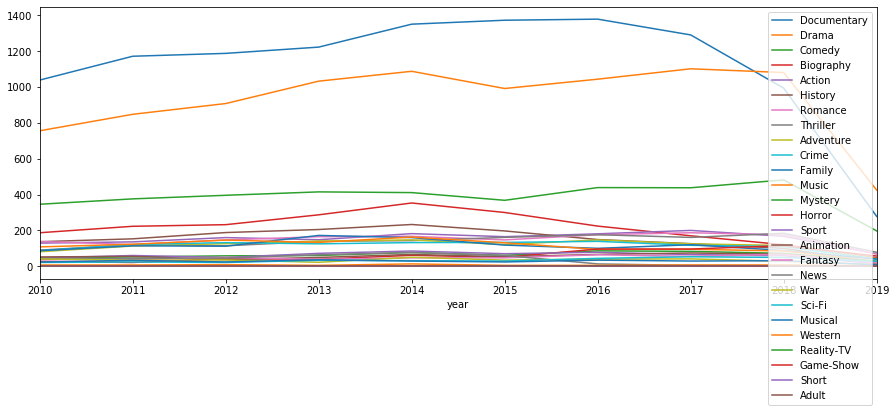

In [71]:
# genre_groups.mean().plot(figsize=(15,5))
genre_groups.plot(figsize=(15,5))

In [72]:
max_rating.head()

,tconst,title,year,runtime_minutes,genres_x,averagerating,numvotes,studio,domestic_gross,foreign_gross,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
6,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9,tt0159369,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
11,tt0170651,T.G.M. - osvoboditel,2018,60.0,Documentary,7.5,6,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
12,tt0176694,The Tragedy of Man,2011,160.0,"Animation,Drama,History",7.8,584,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


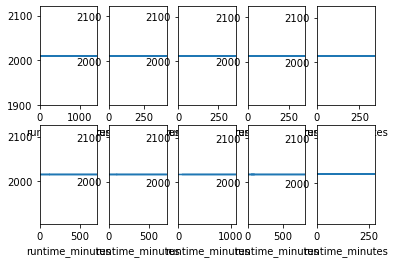

In [73]:
grp=max_rating.iloc[:,2:4].groupby('year')
figsize=(180,180)
# fig,axes=plt.subplots(nrows=2,ncols=5,figsize=(16,16))
for index,(ind,year_value) in enumerate(grp):
    ax=plt.subplot(2,5,index+1)
    year_value.plot('runtime_minutes',ax=ax,legend=False)
    
    
    
    

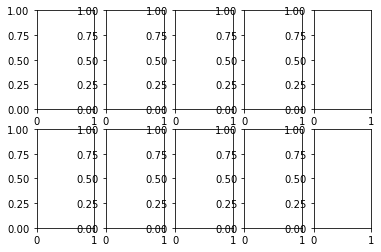

In [74]:
# for i in range(1, 7):
#     plt.subplot(2, 3, i)
#     plt.text(0.5, 0.5, str((2, 3, i)),
#              fontsize=18, ha='center')
for i in range(1,11):
    plt.subplot(2,5,i)
    

In [75]:
# max_rating['runtime_minutes'].plot(figsize=(10,8))


In [76]:
max_rating['runtime_minutes'].unique()

array([ 114.,   83.,  180.,   60.,  160.,  120.,   44.,    0.,   97.,
        103.,  102.,   99.,   92.,  280.,  100.,   87.,   80.,   90.,
        113.,   84.,  110.,  127.,  122.,  150.,  112.,  132.,  141.,
        128.,   56.,  123.,  108.,  104.,  117.,   77.,   98.,  161.,
        116.,  143.,   88.,  101.,  200.,  119.,  131.,  169.,   82.,
         76.,   91.,   96.,  107.,  125.,   67.,   81.,   95.,  121.,
        146.,   93.,   85.,   57.,  126.,   70.,   86.,  105.,  106.,
         78.,   50.,   94.,  118.,   68.,  158.,   65.,  140.,   69.,
         79.,   45.,  115.,  151.,  155.,  137.,   72.,  139.,   52.,
        129.,   55.,  130.,   49.,  133.,  276.,   64.,   51.,   61.,
         54.,  165.,  208.,   89.,  138.,   46.,  148.,   29.,  144.,
         75.,  111.,  135.,  157.,  109.,  272.,  168.,   63.,  124.,
        163.,   74.,   73.,   58.,  164.,  162.,  172.,   53.,  142.,
        153.,  134.,  147.,  145.,  154.,   71.,   62.,   42.,  183.,
        136.,   27.,

In [77]:
# max_rating.plot('runtime_minutes',legend=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff46c9317b8>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff46c931e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff46c931320>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff46c93d550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff46c93d898>],
 'means': []}

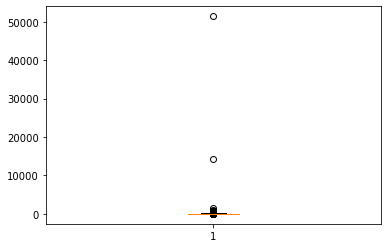

In [78]:
plt.boxplot(movie_df['runtime_minutes'])

In [79]:
# stay_length_fig, x = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# stay_length_axes[0].set_title('Short Stays (< 15 Days)')
# stay_length_axes[0].set_ylabel('Number of Animals')
# stay_length_axes[0].set_xlabel('Days of Shelter')

# stay_length_axes[1].set_title('Long Stays (> 180 Days)')
# stay_length_axes[1].set_ylabel('Number of Animals')
# stay_length_axes[1].set_xlabel('Days of Shelter')

# stay_lengths_low = animal_shelter_df['days_in_shelter'][animal_shelter_df['days_in_shelter'] < 15]
# stay_lengths_high = animal_shelter_df['days_in_shelter'][animal_shelter_df['days_in_shelter'] > 180]

# stay_length_axes[0].hist(stay_lengths_low, bins=15)
# stay_length_axes[1].hist(stay_lengths_high, bins=30)

# plt.savefig("./images/stay_distributions.png", dpi=150)
# plt.show()

In [80]:
# fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
# short_runtime=max_rating.loc[max_rating['runtime_minutes']<90]
# average_runtime=max_rating.loc[(max_rating['runtime_minutes']>90)&(max_rating['runtime_minutes']<=180)]
# axes[0].hist(short_runtime,bins=15)
# axes[1].hist(average_runtime,bins=20)
# plt.show()

# max_rating.loc[max_rating['runtime_minutes']<90].plot(kind='hist',legend=False)
# max_rating.loc[(max_rating['runtime_minutes']>90)&(max_rating['runtime_minutes']<=180)].plot(kind='hist',legend=False)
# max_rating.loc[max_rating['runtime_minutes']>180].plot(kind='hist',legend=False)
# stay_lengths_low = animal_shelter_df['days_in_shelter'][animal_shelter_df['days_in_shelter'] < 15]
# max_rating['runtime_minutes'][(max_rating['runtime_minutes']>90)&(max_rating['runtime_minutes']<=180)].plot(kind='hist',legend=False)



In [81]:
# short_movie=max_rating['runtime_minutes'][(max_rating['runtime_minutes']>40)&(max_rating['runtime_minutes']<70)].plot(kind='hist',legend=False)
short_movie=movie_df['runtime_minutes'][(movie_df['runtime_minutes']>40)&(movie_df['runtime_minutes']<70)]



In [82]:
# avaerage_movie=max_rating['runtime_minutes'][(max_rating['runtime_minutes']>70)&(max_rating['runtime_minutes']<120)].plot(kind='hist',legend=False)
average_movie=movie_df['runtime_minutes'][(movie_df['runtime_minutes']>70)&(movie_df['runtime_minutes']<120)]

In [83]:
# long_movie=max_rating['runtime_minutes'][(max_rating['runtime_minutes']>120)&(max_rating['runtime_minutes']<300)].plot(kind='hist',legend=False)
long_movie=movie_df['runtime_minutes'][(movie_df['runtime_minutes']>120)&(movie_df['runtime_minutes']<300)]


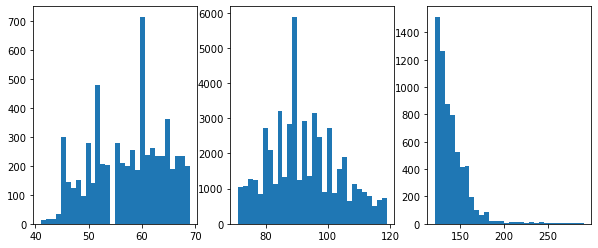

In [84]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(10,4))
axes[0].hist(short_movie,bins=30)
axes[1].hist(average_movie,bins=30)
axes[2].hist(long_movie,bins=30)
plt.show()


In [85]:
movie_df['runtime_minutes'].value_counts()

0.0      7274
90.0     4661
80.0     2117
85.0     2030
100.0    1937
         ... 
720.0       1
206.0       1
254.0       1
209.0       1
217.0       1
Name: runtime_minutes, Length: 289, dtype: int64

In [86]:
movie_df['runtime_minutes'].max()

51420.0

In [87]:
movie_df.head()

,tconst,title,year,runtime_minutes,genres_x,averagerating,numvotes,studio,domestic_gross,foreign_gross,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,2018,0.0,"Comedy,Drama",6.1,13,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


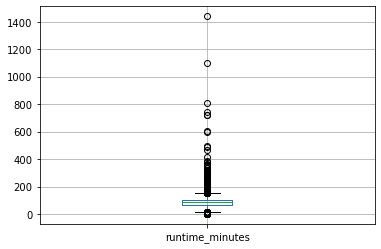

In [88]:
max_rating.boxplot('runtime_minutes')

In [89]:
max_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24088 entries, 1 to 72298
Data columns (total 36 columns):
tconst             24088 non-null object
title              24088 non-null object
year               24088 non-null int64
runtime_minutes    24088 non-null float64
genres_x           24088 non-null object
averagerating      24088 non-null float64
numvotes           24088 non-null int64
studio             509 non-null object
domestic_gross     508 non-null float64
foreign_gross      357 non-null float64
Action             24088 non-null int64
Adult              24088 non-null int64
Adventure          24088 non-null int64
Animation          24088 non-null int64
Biography          24088 non-null int64
Comedy             24088 non-null int64
Crime              24088 non-null int64
Documentary        24088 non-null int64
Drama              24088 non-null int64
Family             24088 non-null int64
Fantasy            24088 non-null int64
Game-Show          24088 non-null int64
Histo

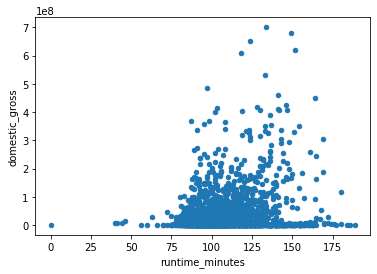

In [90]:
movie_df.plot.scatter(x='runtime_minutes',y='domestic_gross')

In [102]:
# average_movie=(max_rating.loc[(max_rating['runtime_minutes']>70)&(max_rating['runtime_minutes']<120)])
short_movie=movie_df[(movie_df['runtime_minutes']>40)&(movie_df['runtime_minutes']<300)]
short_movie

,tconst,title,year,runtime_minutes,genres_x,averagerating,numvotes,studio,domestic_gross,foreign_gross,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
6,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72294,tt9911774,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
72295,tt9913056,Swarm Season,2019,86.0,Documentary,6.2,5,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
72296,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
72297,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


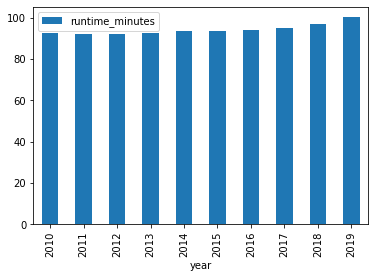

In [104]:
# max_rating.iloc[:,1:4].groupby(by='year').mean().plot(kind='bar')
short_movie.iloc[:,1:4].groupby(by='year').mean().plot(kind='bar')
# short_movie.iloc[:,1:4].short_movie['runtime_minutes'].mean().plot(kind='bar',figsize=(20,20))

/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='density')` instead of `Series.plot('density',)`.
  """Entry point for launching an IPython kernel.


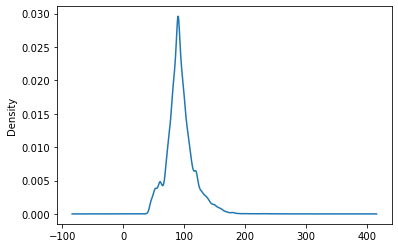

In [106]:
short_movie['runtime_minutes'].plot('density')

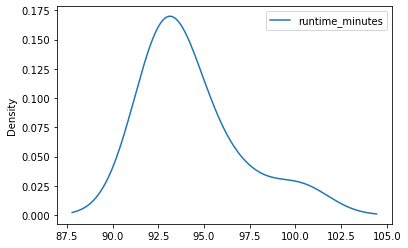

In [107]:
short_movie.iloc[:,1:4].groupby(by='year').mean().plot(kind='density')